<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/M2L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#module2: feature normalization,nearest neighbor revisited
#lab1: revisiting nearest neighbour classifiation
#section-1:DISTANCE METRICS

In [2]:
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [3]:
#euclidean distance- the typical we use 
#straight line distance between two points

In [4]:
#euclidean distance for simple 2D points
x1=np.array((1,2))
x2=np.array((3,4))

In [5]:
#not vectorized approach to find euclidean distance
sum=0
for i in range(len(x1)):
  sum+= ((x1[i]-x2[i])**2)
dist=math.sqrt(sum)
print(dist)

2.8284271247461903


In [6]:
#vectorized approach to find euclidean distance
euclidean_dist=math.sqrt(np.sum((x1-x2)**2))
print(euclidean_dist)

2.8284271247461903


In [7]:
#libraries such as SpiCy provides functions to compare different kinds of distance metrics between points
euclidean_distance=distance.euclidean(x1,x2)
print(euclidean_distance)

2.8284271247461903


In [8]:
#3D visualization 
plotx=np.linspace(-10,10,50)
meshx,meshy=np.meshgrid(plotx,plotx)

In [9]:
tempeuclid=np.sqrt((meshx**2+meshy**2))

In [10]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Surface(z=tempeuclid,x=plotx,y=plotx)])
fig.update_layout(title='Euclidean Distance from Origin',autosize=False,width=1000,height=1000,margin=dict(l=65,r=50,b=65,t=90))
fig.show()

In [11]:
#manhattan distance(taxicab distance)
#length of any of shortest path between points

In [12]:
manhattan_dist=distance.cityblock(x1,x2)
print(manhattan_dist)

4


In [13]:
#vectorized approach to find manhattan distance
manhattan_dist=np.sum(abs(x1-x2))
print(manhattan_dist) 

4


In [14]:
#3D visualization
plotx=np.linspace(-10,10,50)
meshx,meshy=np.meshgrid(plotx,plotx)

In [15]:
tempmanhattan=np.abs(meshx)+np.abs(meshy)

In [16]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Surface(z=tempmanhattan,x=plotx,y=plotx)])
fig.update_layout(title='Manhattan Distance from Origin',autosize=False,width=1000,height=1000,margin=dict(l=65,r=50,b=65,t=90))
fig.show()

In [17]:
#hamming distance
#distance between two strings of SAME LENGTH is the number of positions at which the corresponding characters are different

In [18]:
str1='euclidean distance'
str2='manhattan distance'
hamming_dist=distance.hamming(list(str1),list(str2))*len(str1)
print(hamming_dist)

7.0


In [19]:
#cosine similarity=(A.B)/|A||B|
#always in range [-1,1]

In [20]:
from numpy.linalg import norm
cosine_similarity=1-distance.cosine(x1,x2)
print(cosine_similarity)
cosine_similarity=np.dot(x1,x2)/(norm(x1)*norm(x2))
print(cosine_similarity)

0.9838699100999074
0.9838699100999074


In [21]:
#minkowski distance
minkowski_dist=distance.minkowski(x1,x2,p=3)
print(minkowski_dist)
minkowski_dist=distance.minkowski(x1,x2,p=2)
print(minkowski_dist)
minkowski_dist=distance.minkowski(x1,x2,p=1)
print(minkowski_dist)

2.5198420997897464
2.8284271247461903
4.0


In [22]:
#chebyshev distance(L infinity matric)
#distance between two vectors is the greatest of their differences along any coordinate system

In [23]:
chebyshev_dist=distance.chebyshev(x1,x2)
print(chebyshev_dist)

2


In [24]:
#jaccard distance
#measures dissimilarity between sample sets

In [25]:
#jaccard index=|A intersection B|/|A union B|
#jaccard distance=1-jaccard index

In [26]:
#a= where x1[i]=1 and x2[i]=1
#b= where x1[i]=0 and x2[i]=1
#c= where x1[i]=1 and x2[i]=0
#d= where x1[i]=0 and x2[i]=0
#jaccard distance=1-(a/a+b+c)

In [27]:
print(distance.jaccard([1,0,0],[0,1,0]))
print(distance.jaccard([1,0,0],[1,1,0]))
print(distance.jaccard([1,0,0],[1,1,1]))

1.0
0.5
0.6666666666666666


In [28]:
def jaccard_similarity(a,b):
  c=a.intersection(b)
  return float(len(c))/(len(a)+len(b)-len(c))

list1=['apple','banana','carrot','cucumber']
list2=['carrot','banana','grapes','orange']
words1=set(list1)
words2=set(list2)
print('jaccard similarity:',jaccard_similarity(words1,words2))
print('jaccard distance:',1-jaccard_similarity(words1,words2))

jaccard similarity: 0.3333333333333333
jaccard distance: 0.6666666666666667


In [29]:
#euclidean  used for KNN
#manhattan  used for grids and high dimentional distances
#     curse of dimentionality-when the dimensionality increases,the volume of the space increases so fast that the data become sparse
#cosine similarity  used in text analysis,document comparision problems,collaborative filtering-based recommandation systems,
#hamming  not commonly used
#jaccard index  used for applicaitons where binary data is used,text similarity analysis

In [30]:
#section-2:K-NEAREST NEIGHBOR CLASSIFIER
#classifed by plurality votes of its neighbor
#supervised learning, non-parametric, instance based algorithm

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [32]:
def predict(x_train,y_train,x_test,k):
  distances=[]
  targets=[]
  for i in range(len(x_train)):
    distances.append([np.sqrt(np.sum(np.square(x_test-x_train[i,:]))),i])
  distances=sorted(distances)  
  for i in range(k):
    index=distances[i][1]
    targets.append(y_train[index])
  return Counter(targets).most_common(1)[0][0]

In [33]:
def k_nearest_neighbor(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[!] K cannot be larger than number of samples."
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [34]:
#code for 1NN
def NN1(traindata,trainlabel,query):
  diff=traindata-query
  sq=diff*diff
  dist=sq.sum(1)
  label=trainlabel[np.argmin(dist)]
  return label

In [35]:
#accuracy  ratio of number correctly classified samples to the total number of samples
def accuracy(gtlabel,predlabel):
  assert len(gtlabel)==len(predlabel),'Length of groundtruth labels and predicted labels should be same'
  correct=(gtlabel==predlabel).sum()
  return correct/len(gtlabel)

In [36]:
#trying this on iris dataset
from sklearn.datasets import load_iris
import pandas as pd
dat=load_iris()

df=pd.DataFrame(data=dat.data,columns=dat.feature_names)
df['target']=dat.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
x=np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y=np.array(df['target'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=17)

In [38]:
#predicting
predictions=k_nearest_neighbor(x_train,y_train,x_test,7)

#accuracy
accu=accuracy(y_test,predictions)
print("The accuracy of our classifier is {}%".format(100*accu))


The accuracy of our classifier is 94.0%


In [39]:
#the same using sklearn
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accu=accuracy_score(y_test,y_pred)
print('The acuracy of Sklearn classifier is {}%'.format(100*accu))

The acuracy of Sklearn classifier is 94.0%


In [40]:
#TASK
def prediction(X_train, y_train, X_test, k):
    distances = []
    targets = []
    dist=[]

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
        dist.append(distances[i][0])
    # return most common target
    return (targets,dist)

In [41]:
def k_nearest_neighbors(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(prediction(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [42]:
from sklearn.datasets import load_iris
import pandas as pf
data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [44]:
prediction = k_nearest_neighbors(X_train, y_train, X_test, 7)

In [45]:
prediction
#the first one in each represents the 7 nearest neighbors with their distances in next

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.34641016, 0.38729833, 0.41231056, 0.45825757, 0.45825757,
         0.46904158, 0.47958315]],

       [[1.        , 1.        , 1.        , 2.        , 1.        ,
         1.        , 1.        ],
        [0.2       , 0.24494897, 0.33166248, 0.43588989, 0.48989795,
         0.5       , 0.51961524]],

       [[2.        , 2.        , 2.        , 2.        , 2.        ,
         2.        , 2.        ],
        [0.24494897, 0.36055513, 0.36055513, 0.37416574, 0.42426407,
         0.57445626, 0.57445626]],

       [[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        ],
        [0.17320508, 0.2236068 , 0.26457513, 0.36055513, 0.42426407,
         0.51961524, 0.55677644]],

       [[2.        , 2.        , 2.        , 1.        , 1.        ,
         1.        , 1.        ],
        [0.17320508, 0.28284271, 0.38729833, 0.42426407, 0.435889

In [46]:
#k cant be too small(due to outliers),or too large(cause other classes can influence the object)
#so,we use weighted NN to do the task(nearest have higher weightage)

In [47]:
#understanding decision boundaries
#visualization of the above algorithm

In [48]:
#decision boundaries #voronoi diagram

In [49]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


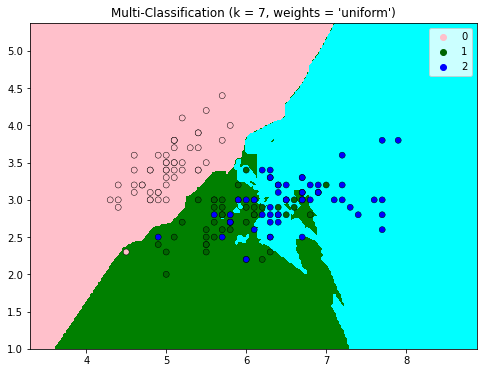

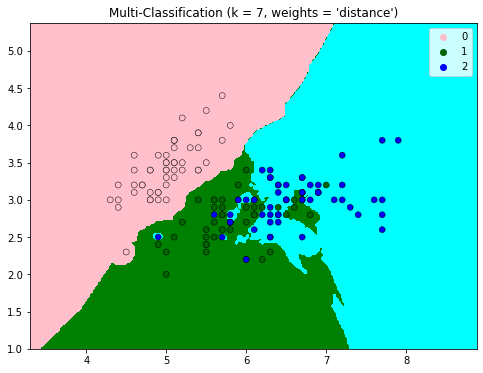

In [50]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

In [51]:
#confusion matrix(error matrix)
from sklearn.metrics import confusion_matrix
pd.crosstab(y_test,predictions,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 15.0, 'Predicted label')

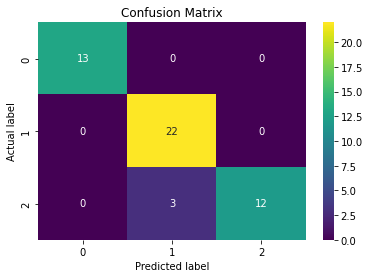

In [52]:
from sklearn import metrics

cnf_matrix=metrics.confusion_matrix(y_test,predictions)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='viridis',fmt='g')
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
#accuracy,precision,recall,F1 score
#accuracy=(TP+TN)/(TP+TN+FP+FN)
#precision=TP/(TP+FP)    accuracy of positive results
#recall=TP/(TP+FN)     fraction of positives that were correctly identified
#F1=(2*precision*recall)/(precision+recall)    harmonic mean of precision and recall

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



In [55]:
#performance metrics
#AUC-ROC performance measurement for classification problems
#AUC tells how much the model can seperate classes
#above diagonal-good classifier and below diagonal-bad classifier
#higher the AUC better model is predicting 0 as 0 and 1 as 1

In [56]:
#AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores=predicted
  fpr,tpr,threshold=roc_curve(y_test,y_scores)
  roc_auc=auc(fpr,tpr)
  plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

In [57]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=17)

In [58]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('The Accuracy of SKlearn classifier is {}%'.format(100*accuracy))

The Accuracy of SKlearn classifier is 92.5531914893617%


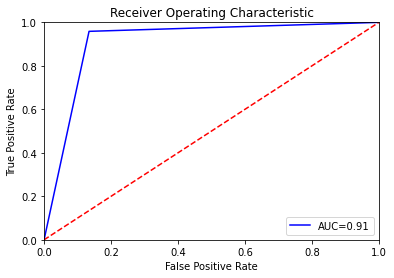

In [59]:
plot_roc(y_test,y_pred)

In [60]:
len(y_test)

188

In [61]:
#section 2.1
#KNN on a synthetic dataset

In [62]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

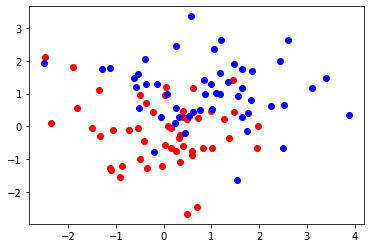

In [63]:
def generate_synth_data(n=50):
  points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
  outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
  return (points,outcomes)

n=50
pts,tgts=generate_synth_data(n) #generates 100 points 
plt.figure()
plt.plot(pts[:n,0],pts[:n,1],'ro')
plt.plot(pts[n:,0],pts[n:,1],'bo')
plt.show()

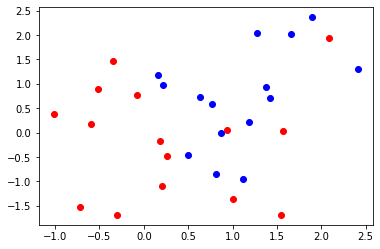

In [64]:
n=15
test_pts,test_tgts=generate_synth_data(n)
plt.figure()
plt.plot(test_pts[:n,0],test_pts[:n,1],'ro')
plt.plot(test_pts[n:,0],test_pts[n:,1],'bo')
plt.show()

In [65]:
#task
from sklearn.neighbors import KNeighborsClassifier as knc

In [66]:
n = 50
x_train,y_train = generate_synth_data(n)
n = 15
x_test,y_test = generate_synth_data(n)

In [67]:
#TASK
#manhattan distance with k=1
knn = KNeighborsClassifier(n_neighbors = 1,p=1)
knn.fit(x_train, y_train)
our_predictions = knn.predict(x_test)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == y_test))

Prediction Accuracy: 
70.0


In [68]:
#euclidean distance with k=1
knn = KNeighborsClassifier(n_neighbors = 1,p=2)
knn.fit(x_train, y_train)
our_predictions = knn.predict(x_test)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == y_test))

Prediction Accuracy: 
63.33333333333333


In [69]:
#minkowski distance with p=3 and k=1
knn = KNeighborsClassifier(n_neighbors = 1,p=3)
knn.fit(x_train, y_train)
our_predictions = knn.predict(x_test)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == y_test))

Prediction Accuracy: 
63.33333333333333


In [70]:
#manhattan distance with k=3
knn = KNeighborsClassifier(n_neighbors = 3,p=1)
knn.fit(x_train, y_train)
our_predictions = knn.predict(x_test)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == y_test))

Prediction Accuracy: 
70.0


In [71]:
#euclidean distance with k=3
knn = KNeighborsClassifier(n_neighbors = 3,p=2)
knn.fit(x_train, y_train)
our_predictions = knn.predict(x_test)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == y_test))

Prediction Accuracy: 
70.0


In [72]:
#minkowski distance with p=3 and k=3
knn = KNeighborsClassifier(n_neighbors = 3,p=3)
knn.fit(x_train, y_train)
our_predictions = knn.predict(x_test)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == y_test))

Prediction Accuracy: 
70.0


In [73]:
#manhattan distance with k=7
knn = KNeighborsClassifier(n_neighbors = 7,p=1)
knn.fit(x_train, y_train)
our_predictions = knn.predict(x_test)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == y_test))

Prediction Accuracy: 
63.33333333333333


In [74]:
#euclidean distance with k=7
knn = KNeighborsClassifier(n_neighbors = 7,p=2)
knn.fit(x_train, y_train)
our_predictions = knn.predict(x_test)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == y_test))

Prediction Accuracy: 
70.0


In [75]:
#minkowski distance with p=3 and k=7
knn = KNeighborsClassifier(n_neighbors = 7,p=3)
knn.fit(x_train, y_train)
our_predictions = knn.predict(x_test)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == y_test))

Prediction Accuracy: 
66.66666666666666


In [76]:
#KNN on real world dataset
from sklearn.datasets import load_iris
iris=load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data['target']=pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [77]:
np.random.seed(360)
indices=np.random.permutation(data.shape[0])
div=int(0.65*len(indices))
train_idx,test_idx=indices[:div],indices[div:]

train_set,test_set=data.loc[train_idx,:],data.loc[test_idx,:]
test_class=list(test_set.iloc[:,-1])
train_class=list(train_set.iloc[:,-1])

In [78]:
def dist_euclidean(x1,x2):
  return distance.euclidean(x1,x2)

In [79]:
def dist_manhattan(x1,x2):
  return distance.cityblock(x1,x2)

In [80]:
def dist_cosine(x1,x2):
  return distance.cosine(x1,x2)

In [81]:
def dist_chebyshev(x1,x2):
  return distance.chebyshev(x1,x2)

In [82]:
metrics_list=[dist_euclidean,dist_cosine,dist_manhattan,dist_chebyshev]
for dist_metric in metrics_list:
  model=KNeighborsClassifier(n_neighbors=3,metric=dist_metric)
  model.fit(train_set, train_class)
  our_predictions=model.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



In [83]:
#distance measures how far the points are from eachother or close they are whereas similarity measures how similar they are to eachother
#a distance metric needs to satisfy these,
#non-negativity d(x,y)>=0
#identity d(x,y) iff x==y
#symmetry d(x,y)=d(y,x)

In [84]:
#imputation of missing values by
#ignoring the entries
#imputation using mean/median values
#imputation using most frequent/zero/constant values
#imputation using knn
#imputation using nueral networks

In [85]:
#feature normalization
#min-max scaling
def rescale(data):
  return(data-data.min())/(data.max()-data.min())

In [86]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [87]:
def plotData(x,y,xlabel='hole',ylabel='bound',fig=None,ax=None):
  if fig is None:
    fig,ax=plt.subplots()
  for i in range(nclasses):
    plt.scatter(x[y==i,0],x[y==i,1])
  plt.legend([str(i) for i in range(nclasses)])  
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  lim2=x.max()
  lim1=x.min()
  add=abs(lim1-lim2)/5
  return fig,ax

In [88]:
## Code for 1 Nearest Neighbours. 

def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary



In [89]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y<nclasses]
train_y = train_y[train_y<nclasses]
test_X = test_X[test_y<nclasses]
test_y = test_y[test_y<nclasses]

train_X = train_X[::100].copy() # We are only taking a subset of the training set
train_y = train_y[::100].copy() # do the same to the labels
test_X = test_X[::100].copy() # taking a subset of the test set. This code takes every 500th sample
test_y = test_y[::100].copy()

# get all the features
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1,2))/(28*28)
# test_sum = np.sum(test_X, (1,2))/(28*28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack((train_hole,train_bound)).transpose()
test_feats = np.vstack((test_hole, test_bound)).transpose()

Text(0.5, 1.0, 'Data before scalng')

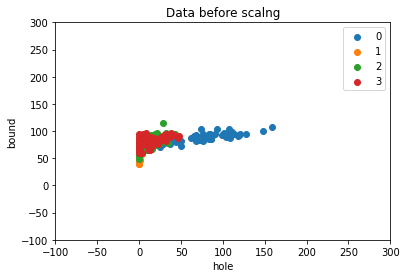

In [90]:
xlim=[-100,300]
ylim=[-100,300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title("Data before scalng")

In [91]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy = ', acc)

Baseline accuracy =  0.7619047619047619


In [92]:
train_feats_rescaled_x = rescale(train_feats[:,0])
train_feats_rescaled_y = rescale(train_feats[:,1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y),1)

test_feats_rescaled_x = rescale(test_feats[:,0])
test_feats_rescaled_y = rescale(test_feats[:,1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y),1)

Text(0.5, 1.0, 'Data after scalng')

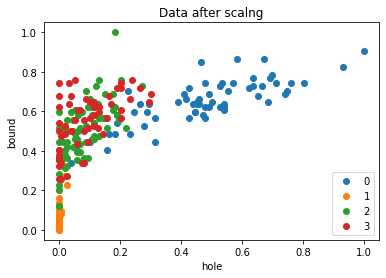

In [93]:
fig, ax = plotData(train_feats_rescaled, train_y)
ax.set_title("Data after scalng")

In [94]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

Accuracy after transform =  0.8095238095238095


In [95]:
#z score clipping
#x(new)=(x(old)-mean)/(standard dviation)

In [96]:
x=cancer.data
y=cancer.target

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=17)

In [99]:
#k=7
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
scores=model.score(x_test,y_test)
print('Score after Z clipping',scores)

Score after Z clipping 0.9521276595744681


In [100]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 60   7]
 [  2 119]]


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        67
           1       0.94      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



In [102]:
#log normalization
df['Normalized Column']=np.log(df['target'])
df.replace([np.inf, -np.inf], 1, inplace=True)
#df.dropna(axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



In [103]:
#TASK
n = 50
x_train,y_train = generate_synth_data(n)
n = 15
x_test,y_test = generate_synth_data(n)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy without log is',accuracy*100,'%')

Accuracy without log is 60.0 %


In [104]:
x_train=np.log(x_train)
x_test=np.log(x_test)
np.nan_to_num(x_train, copy=False, nan=0.0, posinf=0.0, neginf=0.0)
np.nan_to_num(x_test, copy=False, nan=0.0, posinf=0.0, neginf=0.0)
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(x_train,y_train)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy with log is',accuracy*100,'%')

Accuracy with log is 60.0 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in log



In [105]:
from sklearn.datasets import load_iris
import pandas as pf
data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target


In [106]:
df['ID'] = range(1, len(df) + 1)

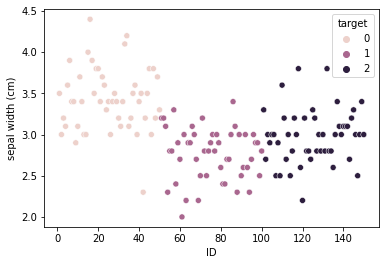

In [107]:
import seaborn as sns
sns.scatterplot(data=df, x="ID",y="sepal width (cm)",hue="target")

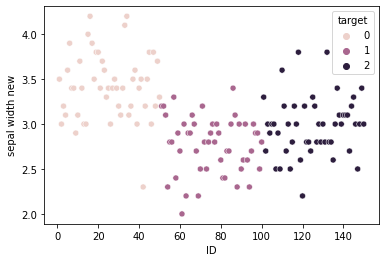

In [108]:
vmax = 4.2
vmin = 2
df['sepal width new'] = df['sepal width (cm)'].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)
sns.scatterplot(data=df, x="ID",y="sepal width new",hue="target")

In [109]:
#TASK
#iris data with z normalization
from sklearn.datasets import load_iris
iris=load_iris()
x=np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y=np.array(df['target'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=17)
model=KNeighborsClassifier(n_neighbors=5,p=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accu=accuracy_score(y_test,y_pred)
print("The accuracy without normalization is {}%".format(100*accu))

The accuracy without normalization is 96.0%


In [110]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'ID', 'sepal width new'],
      dtype='object')

In [111]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df.iloc[:,0:5])

In [112]:
df_scaled = pd.DataFrame(scaled_data,columns=df.columns[0:5])

In [113]:
x=np.array(df_scaled)
y=np.array(df['target'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=17)
model=KNeighborsClassifier(n_neighbors=5,p=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accu=accuracy_score(y_test,y_pred)
print("The accuracy with normalization is {}%".format(100*accu))

The accuracy with normalization is 100.0%
